# Statistical Learning II 

## Project Author
- **Mehyar MLAWEH** : mehyarmlaweh0@gmail.com
---

## Introduction

Breast cancer remains one of the most prevalent and concerning health issues globally. The goal of this project is to test different machine learning models on the Coimbra dataset and determine the best-performing one across multiple metrics. Subsequently, the selected model will be utilized for binary classification, distinguishing between healthy individuals and breast cancer patients. Furthermore, the project aims to extract and analyze the strongest predictors identified by the chosen model to enhance understanding and diagnosis of breast cancer.


#### Motivation for analysis
The motivation for our analysis arises from the urgency of addressing the pervasive issue of cancer, especially breast cancer, which remains a significant concern in medical research. With a large number of predicted fatalities attributed to breast cancer, our goal is to utilize machine learning models to explore this dataset and enhance breast cancer prediction capabilities.

## Data Set Information

The data comprises of **9 predictors**, and a binary dependent variable indicating the presence or absence of breast cancer. All nine predictors are quantitative variables with positive values.

**Variables Overview**

- **Age (years):** Age of the individual.
- **BMI (kg/m2):** Body mass index of the individual.
- **Glucose (mg/dL):** Glucose level of the individual.
- **Insulin (µU/mL):** Insulin level of the individual. Insulin is a hormone made by the pancreas that allows your body to use sugar (glucose) from carbohydrates in the food that you eat for energy or to store glucose for future use.
- **HOMA:** Homeostasis model assessment used to detect insulin resistance and identify patients at high risk of breast cancer development.
- **Leptin (ng/mL):** Leptin, "the hormone of energy expenditure", is a hormone predominantly made by adipose cells that helps to regulate energy balance by inhibiting hunger. Leptin is opposed by the actions of the hormone ghrelin, the "hunger hormone". Both hormones act on receptors in the arcuate nucleus of the hypothalamus.
- **Adiponectin (µg/mL):** Adiponectin (also referred to as GBP-28, apM1, AdipoQ, and Acrp30) is a protein hormone that is involved in regulating glucose levels as well as fatty acid breakdown. In humans, it is encoded by the ADIPOQ gene and is produced in adipose tissue.
- **Resistin (ng/mL):** Resistin, also known as adipose tissue-specific secretory factor (ADSF) or C/EBP-epsilon-regulated myeloid-specific secreted cysteine-rich protein (XCP1), is a cysteine-rich adipose-derived peptide hormone that in humans is encoded by the RETN gene.
- **MCP-1 (pg/dL):** The chemokine (C-C motif) ligand 2 (CCL2) is also referred to as monocyte chemoattractant protein 1 (MCP1) and small inducible cytokine A2. CCL2 is a small cytokine that belongs to the CC chemokine family.

**Labels:** 
- **1:** Healthy controls.
- **2:** Patients.

**Data Link:** 
[Breast Cancer Dataset](https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbr)

**Publication:** 
Patrício, Miguel, J. A. Lobo Pereira, Joana Crisóstomo, Paulo Matafome, Manuel Mendes Gomes, Raquel Seiça and Francisco Caramelo. “Using Resistin, glucose, age and BMI to predict the presence of breast cancer.” BMC Cancer 18 (2018): n. pag.

In [1]:
import sys
import time
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib.figure import Figure 
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import torch
import torch.nn as nn


import pickle

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
!pip freeze > requirements.txt

DEPRECATION: Loading egg at d:\anaconda3\lib\site-packages\gym_maze-0.4-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


---

# Exploratory Data Analysis

## Data Understanding

In [2]:
df = pd.read_csv("dataCancer.csv")
#Rename Mcp.1 to MCP1
df.rename(columns={'MCP.1':'MCP1'},
                     inplace=True)

In [3]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP1            116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [5]:
df.shape

(116, 10)

In [6]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP1', 'Classification'],
      dtype='object')

In [7]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


- **Age:** The dataset encompasses individuals aged between 24 and 89, with an average age of 57.3 years.
- **BMI:** The average BMI is 27.58 kg/m², indicating that the population is, on average, overweight.
- **Glucose and Insulin:** While average glucose levels are within the normal range, insulin levels are slightly elevated (mean of 10.01 µU/mL).
- **HOMA:** The average HOMA score is 2.69, suggesting mild insulin resistance.
- **Leptin and Adiponectin:** Leptin levels are moderately elevated, indicating potential issues with appetite regulation, while adiponectin levels are relatively normal.
- **Resistin and MCP1:** Resistin levels are moderately elevated, potentially indicating inflammation, and MCP1 levels vary widely.

## Data Cleaning

In [8]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP1              0
Classification    0
dtype: int64

In [9]:
df[df.duplicated()]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification


---

## Data Visualization
*"A picture is worth a thousand words"*

### Univariate Analysis

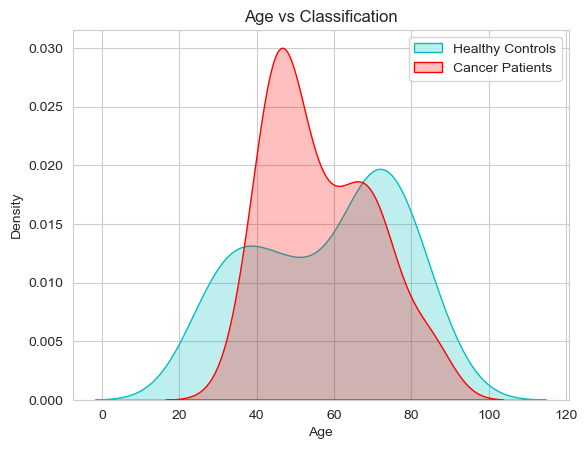

In [10]:
sns.kdeplot(df.Age[df.Classification == 1],color="c",fill=True)
sns.kdeplot(df.Age[df.Classification == 2],color="r",fill=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Age vs Classification')
plt.show()

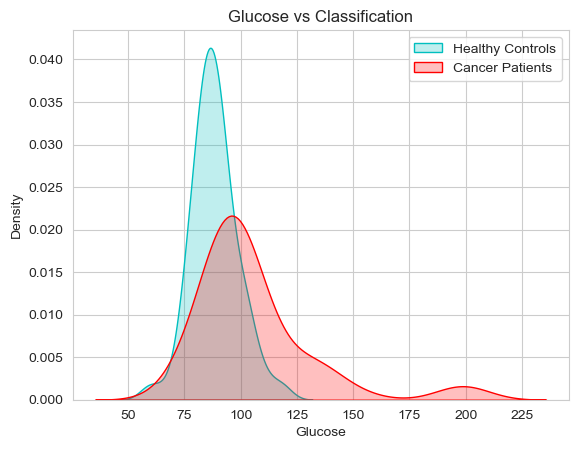

In [11]:
sns.kdeplot(df.Glucose[df.Classification == 1],color="c",shade=True)
sns.kdeplot(df.Glucose[df.Classification == 2],color="r",shade=True)
plt.legend(['Healthy Controls', 'Cancer Patients'])
plt.title('Glucose vs Classification')
plt.show()

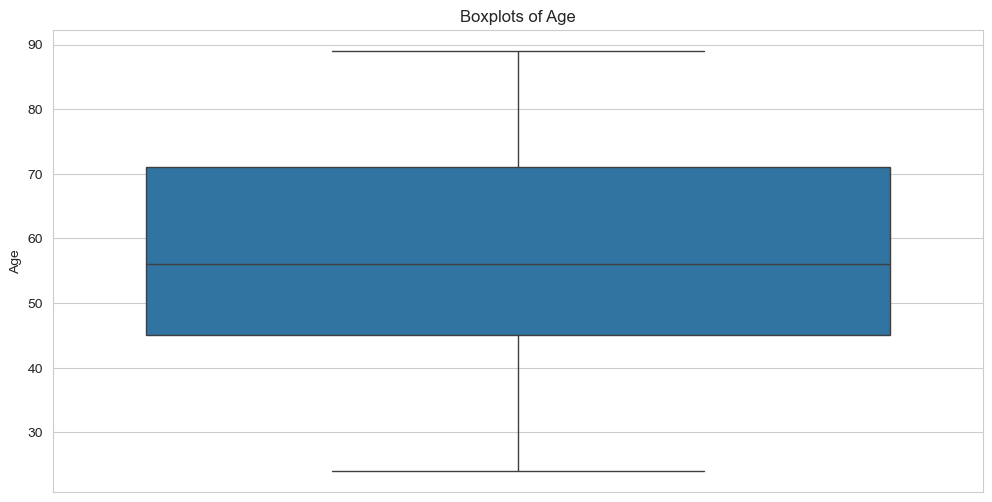

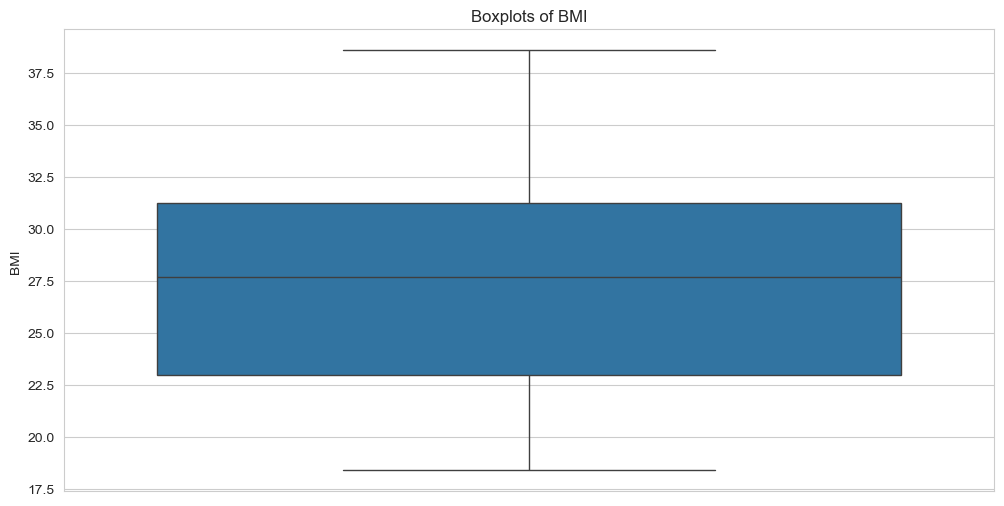

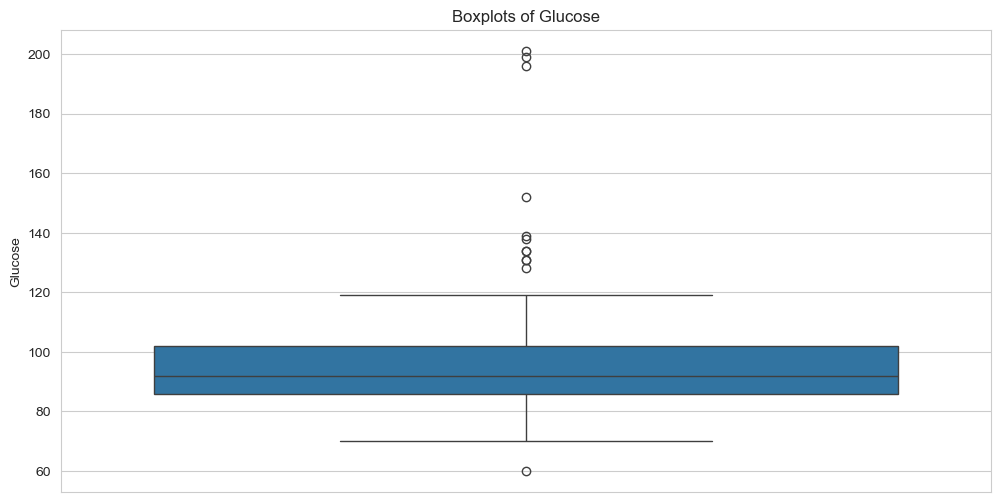

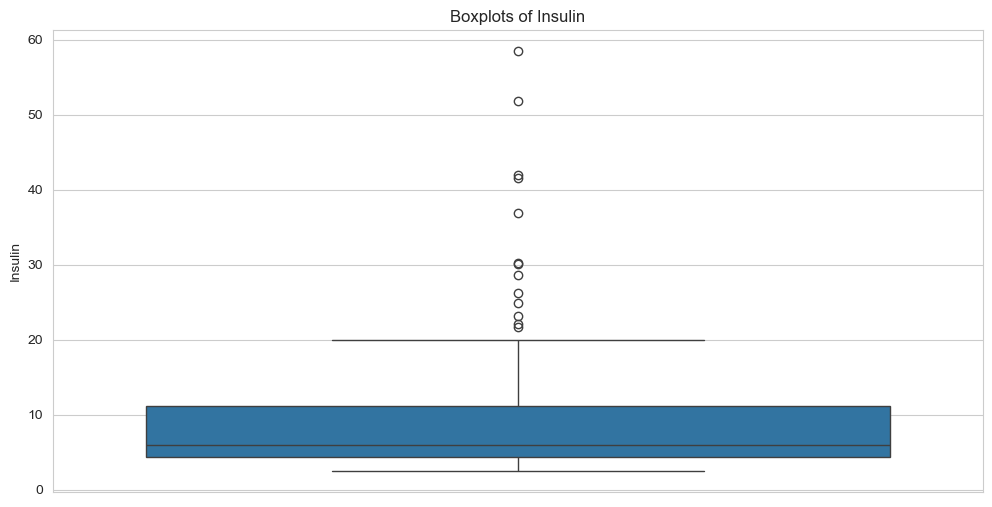

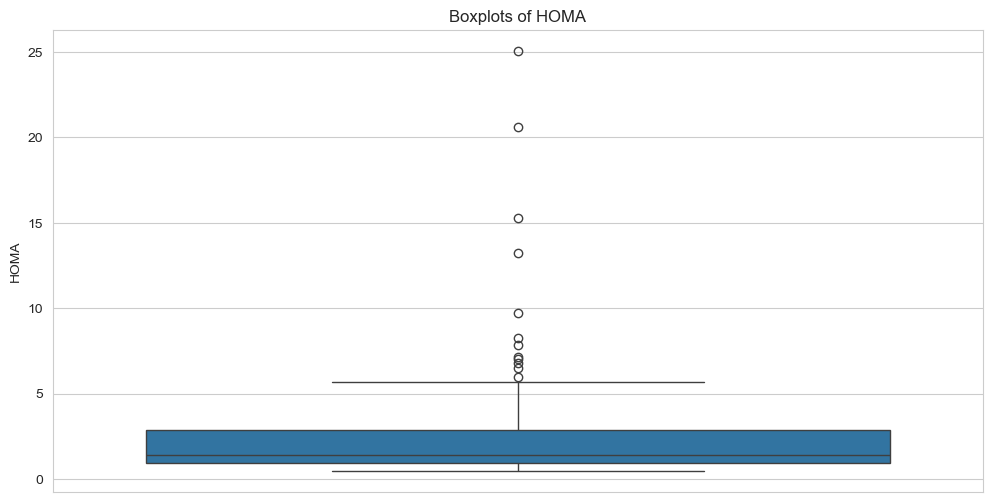

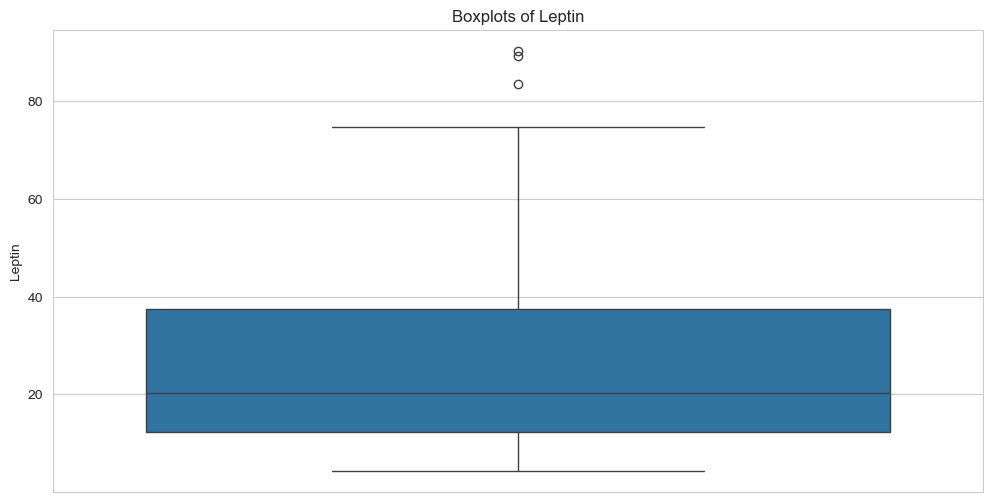

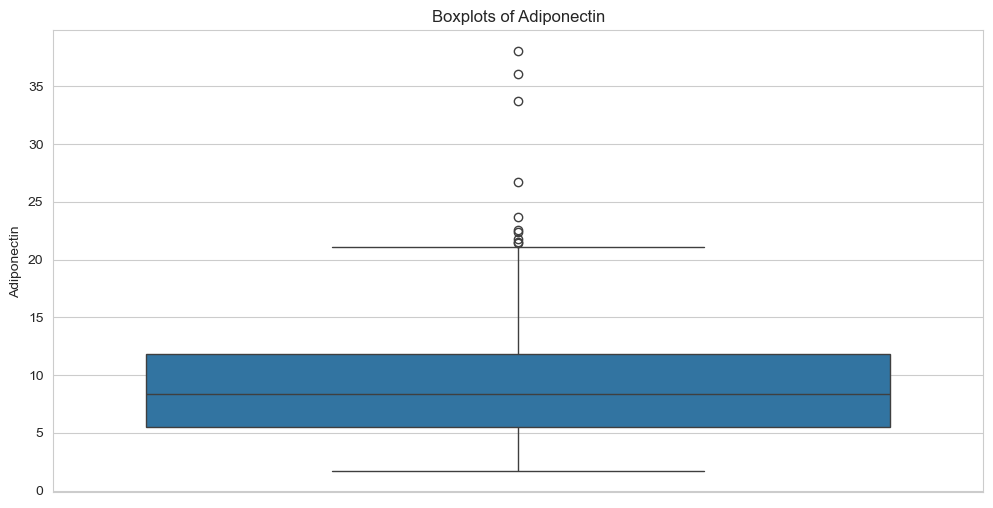

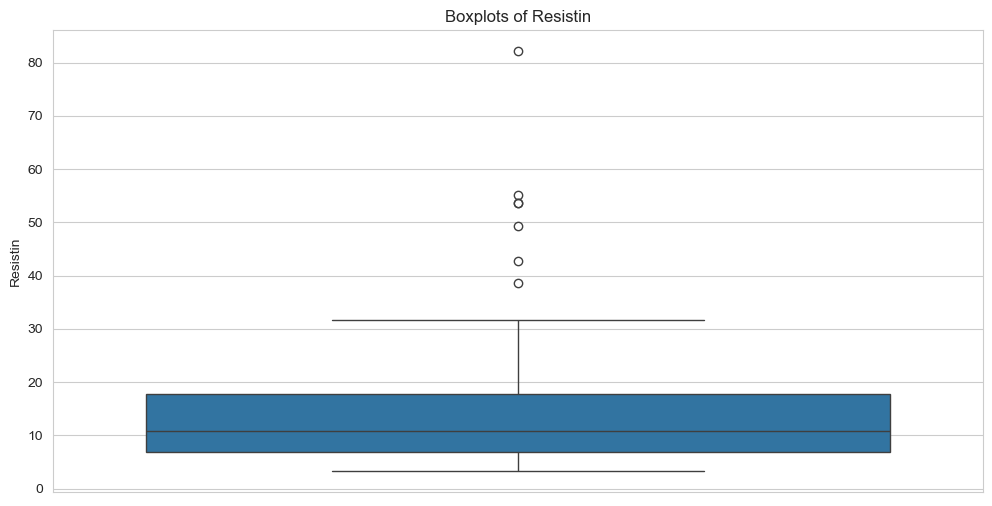

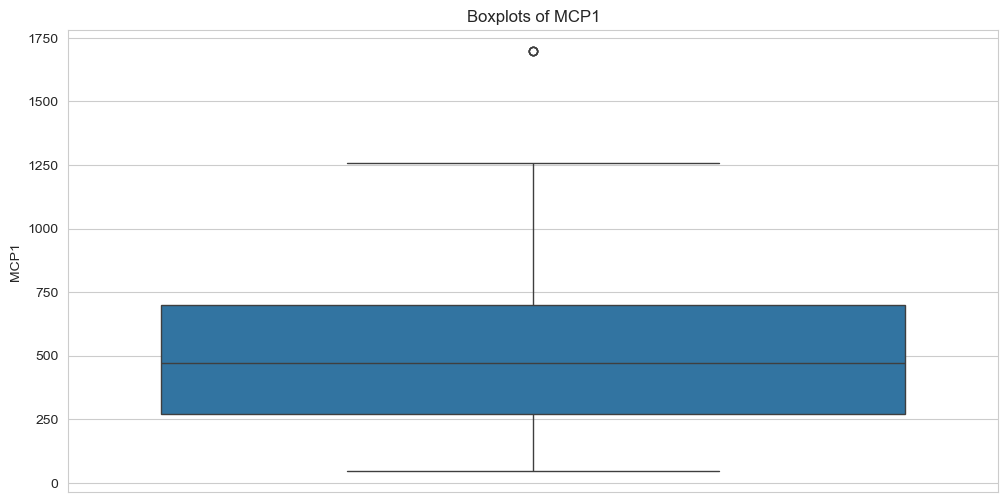

In [12]:
y = df['Classification']
X = df.drop(columns=['Classification'])
for var in X:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[var])
    plt.title('Boxplots of {0}'.format(var))
    plt.xticks(rotation=45)
    plt.show()

**Conclusion:**

Upon visual inspection of the boxplots, it is evident that several variables exhibit outliers. Notable outliers include resistin values greater than 80, adiponectin values greater than 35, HOMA values greater than 20, insulin values greater than 50, and glucose values greater than 180.

To ensure the robustness of our analysis and modeling, we will address these outliers by removing them from the dataset in a later preprocessing step. 


### Feature analysis

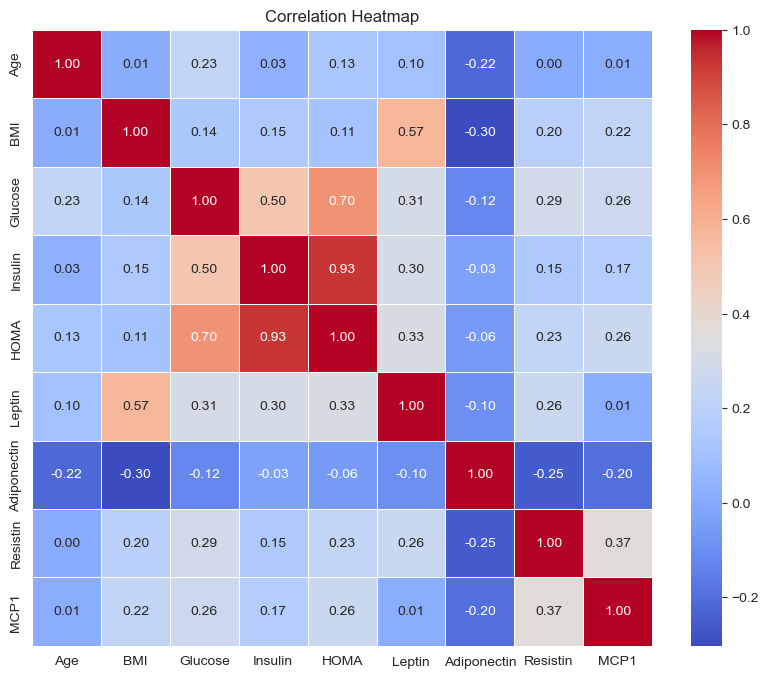

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


1. **Glucose and HOMA:** Strong positive correlation (0.70), indicating higher glucose levels associate with increased insulin resistance (HOMA).

2. **Insulin and HOMA:** Very high positive correlation (0.93), suggesting insulin levels rise with increased insulin resistance (HOMA).

3. **Glucose and Classification:** Moderate positive correlation (0.38), implying higher glucose levels may relate to the patient class.

4. **Leptin and BMI:** Moderate positive correlation (0.57), indicating higher BMI values associate with increased leptin levels.

5. **Adiponectin and Resistin:** Negative correlation (-0.25), suggesting higher adiponectin levels may relate to lower resistin levels, and vice versa.

**Conclusion:**
It appears that each variable offers unique insights into the dataset. Therefore, we conclude that eliminating any variables may result in loss of valuable information. Hence, we will retain all variables for further analysis.


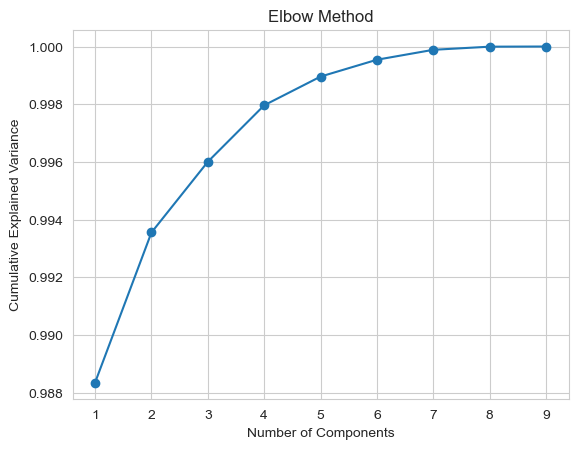

In [14]:
n_components = range(1, 10)  
explained_variance = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variance.append(sum(pca.explained_variance_ratio_))

    
# Cumulative explained variance
plt.plot(n_components, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method')
plt.show()

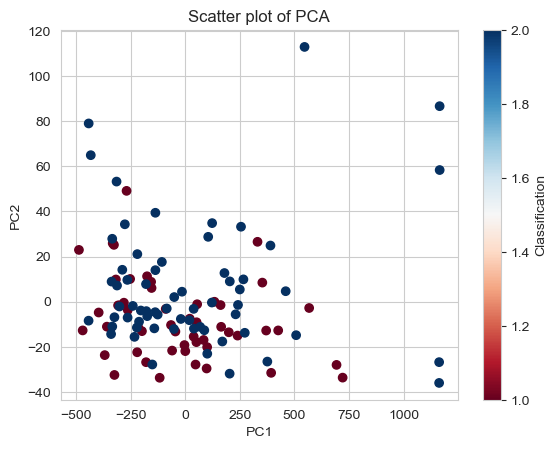

In [15]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
X_pca = pd.DataFrame(data=principalComponents)
X_pca = pd.concat([X_pca.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

plt.scatter(x=X_pca[0], y=X_pca[1], c=X_pca['Classification'], cmap='RdBu')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PCA')
plt.colorbar(label='Classification')
plt.show()


No apparent clustering

## Feature Engineering

In [16]:
df.query('Glucose > 180')
#Drop 78 87 88

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.3701,1698.440,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.2153,1078.359,2
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.6308,1698.440,2


In [17]:
df.query('Insulin > 50')
#drop 71 87 

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
71,44,24.740000,106,58.460,15.285341,18.1600,16.100000,5.3100,244.750,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.2153,1078.359,2


In [18]:
df.query('HOMA > 20')
#drop 78 87

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
78,86,26.666667,201,41.611,20.630734,47.6470,5.357135,24.3701,1698.440,2
87,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.2153,1078.359,2


In [19]:
df.query('Adiponectin > 35')
#drop 13 16

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
13,24,18.67,88,6.107,1.33,8.88,36.06,6.85,632.22,1
16,47,22.03,84,2.869,0.59,26.65,38.04,3.32,191.72,1


In [20]:
df.query('Resistin > 80')
#drop 37 

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP1,Classification
37,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.1,263.499,1


In [21]:
#to_drop = [13,16,37,71,78,87,88] 
#df= df.drop(index=to_drop)

In [22]:
df.shape

(116, 10)

---

# Classification models

In this section, we'll explore various classification models:

1. **K-Nearest Neighbors (KNN) from Scratch**
2. **Naive Bayes with scikit-learn**
3. **Logistic Regression from Scratch**
4. **Recurrent Neural Network (RNN) with PyTorch**
5. **Random Forest with scikit-learn**
6. **Support Vector Machine (SVM) with scikit-learn**
7. **Gradient Boosting with scikit-learn**


In [23]:
model_names = []
training_times = []
testing_times = []
train_accuracies = []
test_accuracies = []
f1_scores = []

# Function to add model performance metrics
def add_model_metrics(model_name, training_time, testing_time, test_accuracy, train_accuracy, f1_score):
    model_names.append(model_name)
    training_times.append(training_time)
    testing_times.append(testing_time)
    test_accuracies.append(test_accuracy)
    train_accuracies.append(train_accuracy)
    f1_scores.append(f1_score)

## Data Splitting and Feature Scaling

In [24]:
y = df['Classification']
X = df.drop(columns=['Classification'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
print("Shape of the X train : ",X_train.shape)
print("Shape of the y train : ",y_train.shape)

Shape of the X train :  (92, 9)
Shape of the y train :  (92,)


## KNN from Scratch

#### Hyperparameter of KNN

**K:** This hyperparameter specifies the number of trees in the forest. Increasing the number of trees generally improves performance but also increases computational cost.


In [27]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the KNNClassifier with the value of k.

     Parameter:
        - k (int): Number of nearest neighbors to consider (default is 3).
        """
        self.k = k

    def fit(self, X, y):
        """
        Fit the KNNClassifier to the training data.

        Parameters:
        - X (array-like): Training samples.
        - y (array-like): Target values.

        This method stores the training data internally for later use in predictions.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """
        Predict the labels for the input samples.

        Parameters:
        - X (array-like): Input samples for prediction.

        Returns:
        - array-like: Predicted labels for the input samples.
        """
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        """
        Predict the label for a single input sample.

        Parameters:
        - x (array-like): Input sample for prediction.

        Returns:
        - object: Predicted label for the input sample.
        """
        # Calculate distances from the input sample to all training samples
        distances = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
        
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = np.array(self.y_train)[k_indices]  
        
        # Determine the most common label among the k nearest neighbors
        most_common = max(set(k_nearest_labels), key=list(k_nearest_labels).count)
        return most_common

    def get_params(self, deep=True):
        """
        Get parameters for this estimator.

        Parameters:
        - deep (bool, optional): Ignored.

        Returns:
        - dict: Parameter names mapped to their values.
        """
        return {'k': self.k}

    def set_params(self, **parameters):
        """
        Set the parameters of this estimator.

        Parameters:
        - **parameters: New parameter values.

        Returns:
        - self: This estimator instance.
        """
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self


In [28]:
param_grid = {'k': [3,5,7, 9, 11]}

knn = KNNClassifier()

scoring = 'accuracy' 

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=scoring)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best Hyperparameter
best_paramsKnn = grid_search.best_params_
print("Best Hyperparameters:", best_paramsKnn)


Best Hyperparameters: {'k': 3}


In [29]:
# Fittting
start_train_time = time.time()
best_k = best_paramsKnn['k']
best_knn = KNNClassifier(k=best_k)
best_knn.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Predictions
start_test_time = time.time()
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

In [30]:
train_accuracyKNN = accuracy_score(y_train, y_pred_train_knn)
test_accuracyKNN = accuracy_score(y_test, y_pred_test_knn)
f1_knn = f1_score(y_test, y_pred_test_knn)

# Adding metrics to list
add_model_metrics('KNN', training_time, testing_time, test_accuracyKNN, train_accuracyKNN, f1_knn)

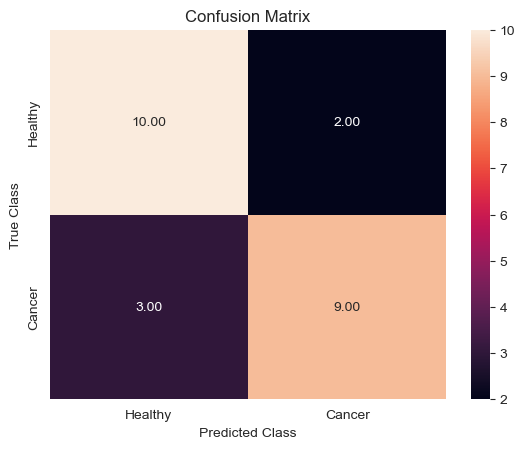

In [31]:
cm = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix')
plt.show()


## Naive Bayes with scikit-learn

#### Hyperparameter of Naive Bayes

**var_smoothing:**  Portion of the largest variance of all features that is added to variances for calculation stability.

In [32]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)


# Best hyperparameters
best_paramsNB = gs_NB.best_params_
best_params_df = pd.DataFrame(best_paramsNB.items(), columns=['HyperParameter', 'Best Value'])
print(best_params_df)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
  HyperParameter  Best Value
0  var_smoothing         0.1


In [33]:
#Fitting
start_train_time = time.time()
gnb = GaussianNB(**best_paramsNB)
gnb.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Predictions
start_test_time = time.time()
y_pred_train = gnb.predict(X_train)
y_pred_test_bayes = gnb.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

In [34]:
test_accuracybayes = accuracy_score(y_test, y_pred_test_bayes)
train_accuracybayes = accuracy_score(y_train, y_pred_train)
f1_nb = f1_score(y_test, y_pred_test_bayes)


# Adding metrics to lists
add_model_metrics('Naive Bayes', training_time, testing_time, test_accuracybayes, train_accuracybayes, f1_nb)

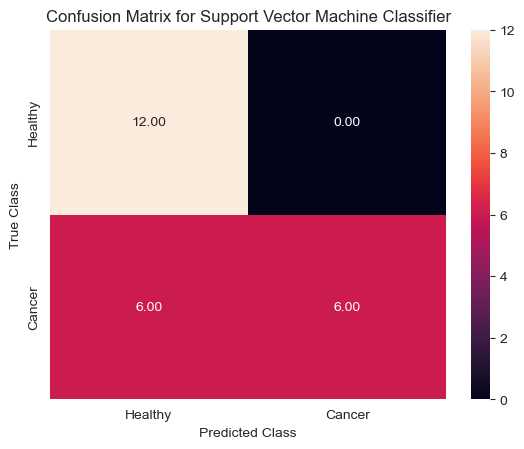

In [35]:
cm_svm = confusion_matrix(y_test, y_pred_test_bayes)
sns.heatmap(cm_svm, annot=True, fmt='.2f', xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


## Logistic Regression with sklearn

#### Hyperparameters of Logistic Regression for Grid Search

- **C**: Regularization parameter. It controls the strength of regularization. A smaller value of C indicates stronger regularization, while a larger value indicates weaker regularization. Regularization helps prevent overfitting by penalizing large parameter values.

- **Penalty**: Regularization term. 
  - 'l1': Lasso regularization adds the absolute value of the coefficients to the loss function.
  - 'l2': Ridge regularization adds the squared value of the coefficients to the loss function.
  - 'none': No regularization is applied.
  Note: Elastic Net regularization, which combines both L1 and L2 penalties, is not included in this grid search as it's not supported by the specified solvers (liblinear, newton-cg ). Source [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#:~:text=the%20Hessian%20matrix.-,Warning,-The%20choice%20of)

- **Solver**: Algorithm to use in the optimization problem.
  - 'liblinear': Suitable for small datasets. Supports both 'l1' and 'l2' penalties.
  - 'newton-cg': Suitable for multiclass problems. Supports 'l2' penalty and no penalty ('none').
  - Note: The choice of solver depends on the penalty chosen. For example, 'liblinear' supports 'l1' and 'l2' penalties, while 'newton-cg' supports 'l2' penalty and no penalty ('none').

- **Max_iter**: Maximum number of iterations for the optimization algorithm to converge. It defines the number of iterations taken for the optimization algorithm to converge to a solution.


In [36]:
logistic_model = LogisticRegression(random_state=10)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2','none'],   #
    'solver': ['liblinear','newton-cholesky'], 
    #For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
    #For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
    #‘newton-cholesky’ is a good choice for n_samples >> n_features
    'max_iter': [100, 200, 300], 
}

grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
best_params_lg = grid_search.best_params_
print("Best Hyperparameters:", best_params_lg)


Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [37]:
#Fitting
start_train_time = time.time()
LogisticModel = LogisticRegression(**best_params_lg, random_state=10)
LogisticModel.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Predictions
start_test_time = time.time()
y_pred_train_lg = LogisticModel.predict(X_train)
y_pred_test_lg = LogisticModel.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

In [38]:
test_accuracyLG = accuracy_score(y_test, y_pred_test_lg)
train_accuracyLG = accuracy_score(y_train, y_pred_train_lg)
f1_lg = f1_score(y_test, y_pred_test_lg)


# Adding metrics to lists
add_model_metrics('Logistic Regression L1', training_time, testing_time, test_accuracyLG, train_accuracyLG, f1_lg)

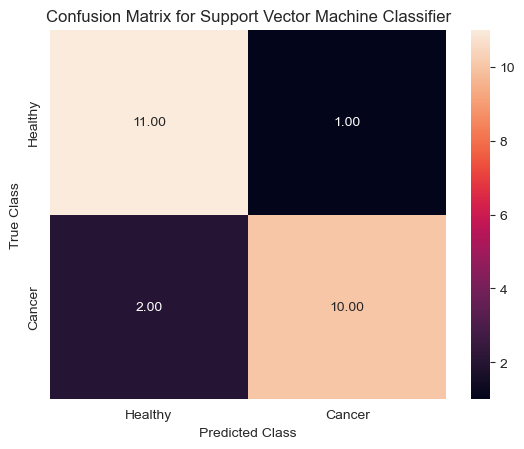

In [39]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_test_lg)
sns.heatmap(cm_svm, annot=True, fmt='.2f', xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


## RNN with PyTorch

In [40]:
# Converting data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
# Adjusting labels to start from 0 since in the datset they are 1 or 2
y_train_tensor = torch.from_numpy(y_train.values - 1).long()  
y_test_tensor = torch.from_numpy(y_test.values - 1).long()   


In [41]:
X_train_tensor.shape

torch.Size([92, 9])

In [42]:
# preparing the data to be compatible with the input shape expected by the LSTM layer in the model
X_train_tensor = X_train_tensor.view(-1, 1, X_train_tensor.shape[1])
X_test_tensor = X_test_tensor.view(-1, 1, X_test_tensor.shape[1])



In [43]:
print("X Train : Passing from shape of from {0} to {1}".format(X_train.shape,X_train_tensor.shape))

X Train : Passing from shape of from (92, 9) to torch.Size([92, 1, 9])


- **Batch Size (92):**
  - Represents the number of samples processed simultaneously during training or inference.

- **Number of Timesteps (1):**
  - Each sample is treated as a single sequence without further division into multiple timesteps.

- **Number of Features per Timestep (9):**
  - Each timestep contains nine features, representing different attributes.


In [44]:
print("Y : Changing labels target from (1 AND 2) To {0}".format(torch.unique(y_train_tensor)))

Y : Changing labels target from (1 AND 2) To tensor([0, 1])


In [45]:
device = torch.device('cpu')

In [46]:
batch_size = 32 # each iteration of training will process 32 sequences of data simultaneously

class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Initializing the initial hidden state and cell state tensors
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # Forward pass through the LSTM layer
        out, _ = self.rnn(x, (h0, c0))
        # Taking only the output of the last time step
        out = self.fc(out[:, -1, :])
        return out


In [47]:
print("Number of feaures :", X_train_tensor.size(-1))

Number of feaures : 9


In [48]:
input_size = X_train_tensor.size(-1)

- LSTM (Long Short-Term Memory) networks have a more complex architecture compared to traditional RNNs. They include special units called memory cells, which have the ability to maintain information over long sequences.
##### Model Hyperparameters:

- `hidden_size`: Number of hidden units in the LSTM layer.
- `num_layers`: Number of layers in the LSTM network.
- `num_classes`: Number of classes in the classification task.
- `learning_rate`: Step size for updating model weights during training.
- `num_epochs`: Number of complete passes through the dataset during training.

- `model`: Instantiates the SimpleRNN model with specified architecture parameters and moves it to the specified device.

##### Optimization:

- `criterion`: Defines the cost function used to compute the difference between predictions and target labels.
- `optimizer`: Defines the optimization algorithm used to update model parameters based on computed gradients.

In [49]:
# model parameters
hidden_size = 64
# 128 is a common choice for hidden layer 
#sizes in neural networks but since our dataset is small we will work with 64 and 1 hidden layer
num_layers = 1
num_classes = 2  
learning_rate = 0.001
num_epochs = 70

# Instantiating the model
model = SimpleRNN(input_size, hidden_size, num_layers, num_classes).to(device)

# The cost function and optimizer
criterion = nn.CrossEntropyLoss() # Since it s a classification problem 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [50]:
# Train
for epoch in range(num_epochs):
    # Forward pass
    start_time = time.time()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    end_time = time.time()
    
    training_time = end_time - start_time
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Time: {training_time:.4f}')


Epoch [1/70], Loss: 0.6906, Training Time: 0.0183
Epoch [2/70], Loss: 0.6891, Training Time: 0.0025
Epoch [3/70], Loss: 0.6876, Training Time: 0.0010
Epoch [4/70], Loss: 0.6861, Training Time: 0.0010
Epoch [5/70], Loss: 0.6845, Training Time: 0.0020
Epoch [6/70], Loss: 0.6830, Training Time: 0.0013
Epoch [7/70], Loss: 0.6815, Training Time: 0.0010
Epoch [8/70], Loss: 0.6800, Training Time: 0.0020
Epoch [9/70], Loss: 0.6785, Training Time: 0.0005
Epoch [10/70], Loss: 0.6770, Training Time: 0.0020
Epoch [11/70], Loss: 0.6754, Training Time: 0.0010
Epoch [12/70], Loss: 0.6739, Training Time: 0.0010
Epoch [13/70], Loss: 0.6723, Training Time: 0.0018
Epoch [14/70], Loss: 0.6707, Training Time: 0.0007
Epoch [15/70], Loss: 0.6691, Training Time: 0.0020
Epoch [16/70], Loss: 0.6675, Training Time: 0.0000
Epoch [17/70], Loss: 0.6658, Training Time: 0.0025
Epoch [18/70], Loss: 0.6641, Training Time: 0.0010
Epoch [19/70], Loss: 0.6624, Training Time: 0.0010
Epoch [20/70], Loss: 0.6607, Training Ti

- Source Pytorch : When using `torch.no_grad():`, PyTorch temporarily sets all gradient tracking to off. 
- This is useful during inference or evaluation, where gradients are not needed, improving efficiency and reducing memory consumption.


In [51]:
# Testing the model
with torch.no_grad():

    start_time = time.time()
    
    outputs = model(X_test_tensor)
    
    end_time = time.time()
    
    testing_time = end_time - start_time
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_test_tensor).sum().item()
    test_accuracyrnn = correct / len(y_test_tensor) 
    print(f'Accuracy on the test set: {test_accuracyrnn:.2}%, Testing Time: {testing_time:.4f}')

    f1_rnn = f1_score(y_test_tensor, predicted, average='weighted')
    print(f'F1 Score: {f1_rnn:.4f}')
    
    train_predicted = model(X_train_tensor)
    _, train_predicted = torch.max(train_predicted, 1)
    train_correct = (train_predicted == y_train_tensor).sum().item()
    train_accuracyrnn = train_correct / len(y_train_tensor) 
    print(f'Accuracy on the train set: {train_accuracyrnn:.2f}%')

add_model_metrics("RNN LSTM", training_time, testing_time, test_accuracyrnn, train_accuracyrnn, f1_rnn)


Accuracy on the test set: 0.75%, Testing Time: 0.0015
F1 Score: 0.7483
Accuracy on the train set: 0.76%


## Random Forest with scikit-learn

#### Hyperparameters of Random Forest Classifier

1. **n_estimators:** This hyperparameter specifies the number of trees in the forest. Increasing the number of trees generally improves performance but also increases computational cost.

2. **criterion:** It defines the function to measure the quality of a split. Two commonly used criteria are 'gini' for the Gini impurity and 'entropy' for the information gain.

3. **max_depth:** This parameter specifies the maximum depth of the decision trees. Limiting the depth helps prevent overfitting.

4. **min_samples_split:** The minimum number of samples required to split an internal node. This parameter helps control overfitting by setting a threshold for node splitting.

5. **min_samples_leaf:** The minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, it helps control overfitting by setting a threshold for the minimum number of samples in leaves.

In [52]:
forest_model = RandomForestClassifier(random_state=10)

param_grid = {
    'n_estimators': [5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
best_params = grid_search.best_params_
best_params_df = pd.DataFrame(best_params.items(), columns=['Hyperparameter', 'Best Value'])
print(best_params_df)

      Hyperparameter Best Value
0          criterion    entropy
1          max_depth          5
2   min_samples_leaf          1
3  min_samples_split         10
4       n_estimators         20


In [53]:
#Fitting

start_train_time = time.time()
forest_model = RandomForestClassifier(**best_params, random_state=10)
forest_model.fit(X_train, y_train)
end_train_time = time.time()
training_time = end_train_time - start_train_time

# Predictions

start_test_time = time.time()
y_pred_train_fm = forest_model.predict(X_train)
y_pred_test_fm = forest_model.predict(X_test)
end_test_time = time.time()
testing_time = end_test_time - start_test_time

In [54]:
test_accuracyFM = accuracy_score(y_test, y_pred_test_fm)
train_accuracyFM = accuracy_score(y_train, y_pred_train_fm)
f1_rf = f1_score(y_test, y_pred_test_fm)

# Adding metrics to lists
add_model_metrics('Random Forest', training_time, testing_time, test_accuracyFM, train_accuracyFM, f1_rf)

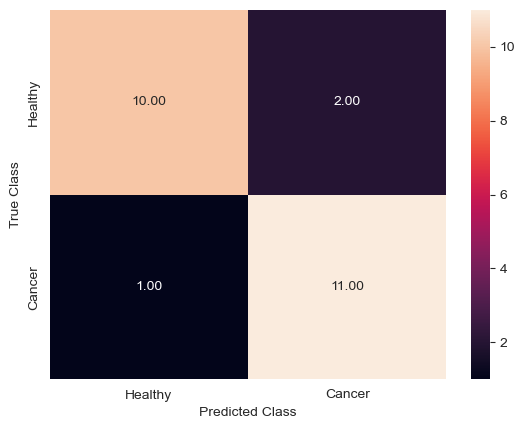

In [55]:
cm = confusion_matrix(y_test, y_pred_test_fm)
sns.heatmap(cm, annot=True, fmt='.2f',
            xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### SVM with scikit-learn

#### Hyperparameters:

1. **C:** The regularization parameter, which controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to a larger margin but may result in more misclassifications, while a larger value of C allows for a smaller margin but fewer misclassifications. 

2. **kernel:** Specifies the kernel type used in the algorithm. Common kernel functions include 'linear', 'rbf' (radial basis function), and 'poly' (polynomial). The choice of kernel affects the decision boundary shape and model performance.

3. **gamma:** Parameter for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of a single training example, with low values meaning ‘far’ and high values meaning ‘close’. A smaller gamma value results in a smoother decision boundary, while a larger gamma value leads to more complex decision boundaries.

4. **degree:** Degree of the polynomial kernel function ('poly'). It specifies the degree of the polynomial kernel function and influences the flexibility of the decision boundary. Higher degrees allow the model to capture more complex relationships in the data but may lead to overfitting.


In [56]:
svm_model = SVC(random_state=10)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Best Hyperparameters
best_params_svm = grid_search_svm.best_params_
best_params_df_svm = pd.DataFrame(best_params_svm.items(), columns=['Hyperparameter', 'Best Value'])
print(best_params_df_svm)

  Hyperparameter Best Value
0              C         10
1         degree          3
2          gamma       auto
3         kernel       poly


**PS** : When using scikit-learn's `GridSearchCV`, setting `n_jobs=-1` as a parameter means that the grid search will utilize all available CPU cores for parallel processing.

In [57]:
# Fitting
start_train_time_svm = time.time()
svm_model = SVC(**best_params_svm, random_state=10)
svm_model.fit(X_train, y_train)
end_train_time_svm = time.time()
training_time_svm = end_train_time_svm - start_train_time_svm

# Predictions
start_test_time_svm = time.time()
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)
end_test_time_svm = time.time()
testing_time_svm = end_test_time_svm - start_test_time_svm


In [58]:
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
f1_svm = f1_score(y_test, y_pred_test_svm)

# Adding metrics to lists
add_model_metrics('Support Vector Machine', training_time_svm, testing_time_svm, test_accuracy_svm, train_accuracy_svm, f1_svm)


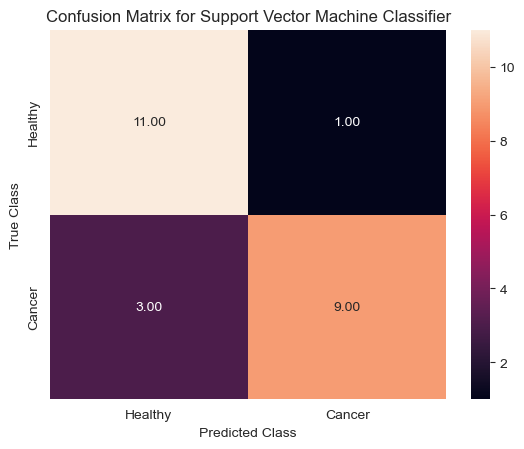

In [59]:
cm_svm = confusion_matrix(y_test, y_pred_test_svm)
sns.heatmap(cm_svm, annot=True, fmt='.2f', xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()


## Gradient Boosting with scikit-learn

Gradient Boosting is an **ensemble learning** technique used for classification and regression tasks. It works by combining multiple weak learners, typically decision trees, into a single strong learner. Unlike traditional ensemble methods like Random Forest, Gradient Boosting builds trees sequentially, where each subsequent tree corrects the errors made by the previous one. 

#### Hyperparameters of Gradient Boosting Classifier

1. **n_estimators:** This hyperparameter specifies the number of boosting stages or trees to be built. Increasing the number of estimators generally improves the performance of the model, but it also increases computational cost.

2. **learning_rate:** It controls the contribution of each tree in the sequence. Lower learning rates require more trees in the ensemble but often result in better generalization. Higher learning rates can lead to overfitting.

3. **max_depth:** This parameter specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships in the data but are more prone to overfitting.

4. **min_samples_split:** The minimum number of samples required to split an internal node. This parameter helps control overfitting by setting a threshold for node splitting.

5. **min_samples_leaf:** The minimum number of samples required to be at a leaf node. Similar to `min_samples_split`, it helps control overfitting by setting a threshold for the minimum number of samples in leaves.


In [60]:
gb_model = GradientBoostingClassifier(random_state=10)

# Hyperparameters grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best Hyperparameters
best_params_gb = grid_search_gb.best_params_
best_params_df_gb = pd.DataFrame(best_params_gb.items(), columns=['Hyerparameter', 'Best Value'])
print(best_params_df_gb)

       Hyerparameter  Best Value
0      learning_rate         0.5
1          max_depth         3.0
2   min_samples_leaf         1.0
3  min_samples_split         5.0
4       n_estimators       100.0


In [61]:
# Fitting
start_train_time_gb = time.time()
gb_model = GradientBoostingClassifier(**best_params_gb, random_state=10)
gb_model.fit(X_train, y_train)
end_train_time_gb = time.time()
training_time_gb = end_train_time_gb - start_train_time_gb

# Predictions
start_test_time_gb = time.time()
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)
end_test_time_gb = time.time()
testing_time_gb = end_test_time_gb - start_test_time_gb


In [62]:
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
f1_gb = f1_score(y_test, y_pred_test_gb)

# Adding metrics to lists
add_model_metrics('Gradient Boosting', training_time_gb, testing_time_gb, test_accuracy_gb, train_accuracy_gb, f1_gb)


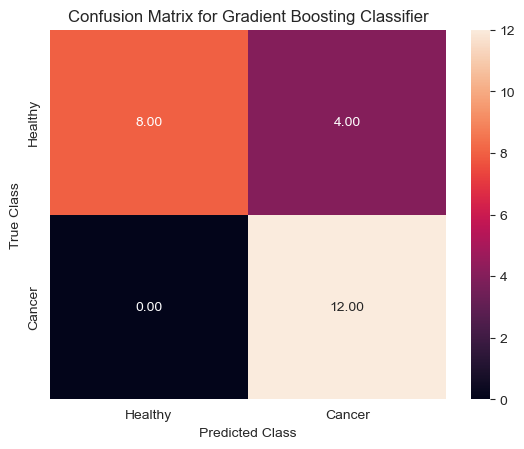

In [63]:
cm_gb = confusion_matrix(y_test, y_pred_test_gb)
sns.heatmap(cm_gb, annot=True, fmt='.2f', xticklabels=['Healthy', 'Cancer'], yticklabels=['Healthy', 'Cancer'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

---

In [64]:
# Lists to a DataFrame
performance_df = pd.DataFrame({
    'Model': model_names,
    'Training Time (s)': training_times,
    'Testing Time (s)': testing_times,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'F1 Score': f1_scores
})

# Display the DataFrame
performance_df

,Model,Training Time (s),Testing Time (s),Train Accuracy,Test Accuracy,F1 Score
0,KNN,0.000000,0.054790,0.804348,0.791667,0.800000
1,Naive Bayes,0.000000,0.000000,0.586957,0.750000,0.800000
2,Logistic Regression L1,0.000000,0.004005,0.771739,0.875000,0.880000
3,RNN LSTM,0.002121,0.001514,0.760870,0.750000,0.748252
4,Random Forest,0.020056,0.000000,0.956522,0.875000,0.869565
5,Support Vector Machine,0.002001,0.000506,0.923913,0.833333,0.846154
6,Gradient Boosting,0.071657,0.005043,1.000000,0.833333,0.800000


<Figure size 1500x800 with 0 Axes>

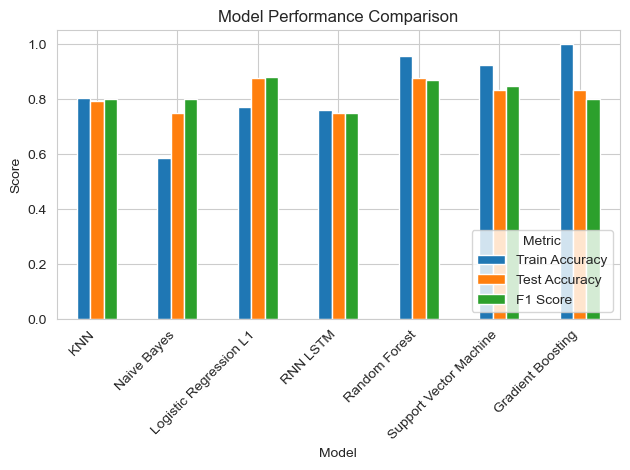

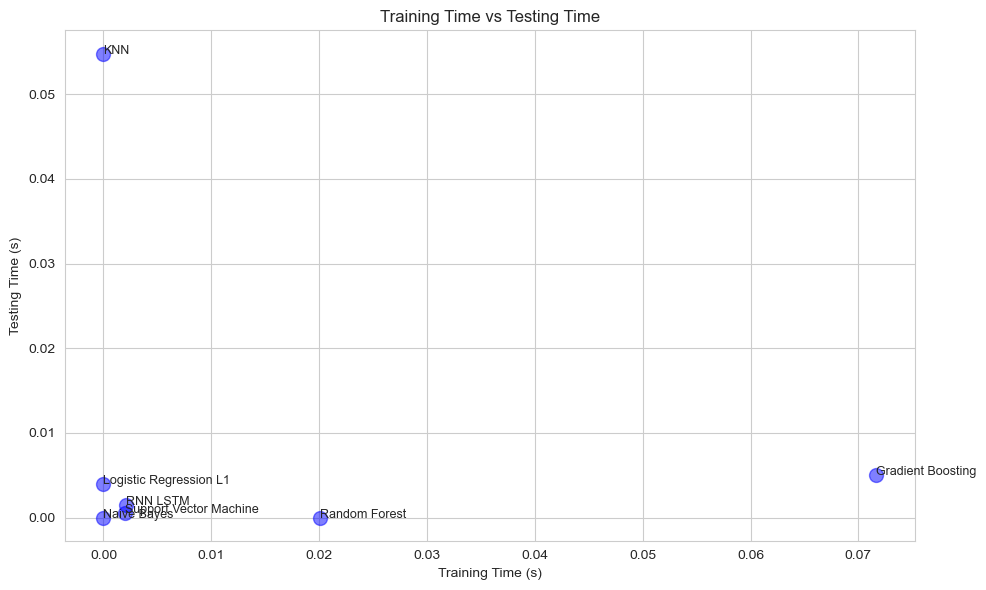

In [65]:
plt.figure(figsize=(15, 8))
performance_df.set_index('Model')[['Train Accuracy', 'Test Accuracy', 'F1 Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(performance_df['Training Time (s)'], performance_df['Testing Time (s)'], s=100, c='blue', alpha=0.5)
plt.title('Training Time vs Testing Time')
plt.xlabel('Training Time (s)')
plt.ylabel('Testing Time (s)')
for i, model in enumerate(performance_df['Model']):
    plt.text(performance_df['Training Time (s)'][i], performance_df['Testing Time (s)'][i], model, fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()


### Choosing the Best Model

Among the models evaluated, the **Gradient Boosting** model seems to perform the best overall, achieving the highest training accuracy and competitive testing accuracy and F1 score. However, Random Forest also demonstrates strong performance across all metrics.


#### Potential for Better Performance: 
GB's sequential learning corrects errors iteratively, potentially leading to superior predictive performance compared to the Random Forest model.


#### High Training Accuracy:
The Gradient Boosting model achieves a perfect training accuracy of 1.0, indicating that it effectively captures the patterns and complexities within the training data. This suggests that the model can learn the underlying relationships between the predictors and the presence of breast cancer.

#### Competitive Testing Accuracy and F1 Score:
While the Gradient Boosting model doesn't have the highest testing accuracy, it still achieves a respectable accuracy of 0.833, indicating good generalization to unseen data. Additionally, its F1 score of 0.8 demonstrates a balance between precision and recall, which is crucial in medical classification tasks where both false positives and false negatives can have significant consequences.

#### Robustness to Overfitting:
Despite having a high training accuracy, the Gradient Boosting model doesn't exhibit signs of overfitting, as indicated by its reasonable testing accuracy. This suggests that the model generalizes well to new data, which is essential for reliable predictions in clinical settings.

#### Potential for Interpretability:
Gradient Boosting models can provide insights into feature importance, allowing clinicians to understand which predictors are most influential in predicting breast cancer. This interpretability can aid in clinical decision-making and potentially uncover new insights about the disease.

#### Suitability for Imbalanced Data:
Since medical datasets often suffer from class imbalance (e.g., fewer instances of cancer patients compared to healthy controls), Gradient Boosting, with its ability to handle class imbalance through boosting techniques, can be advantageous in such scenarios.


### Saving the Model

In [70]:
pickle.dump(gb_model, open('model.pkl', 'wb'))

 ### Feature importances

    Feature  Importance
2   Glucose    0.308871
0       Age    0.152752
7  Resistin    0.138096
3   Insulin    0.111100
1       BMI    0.094124


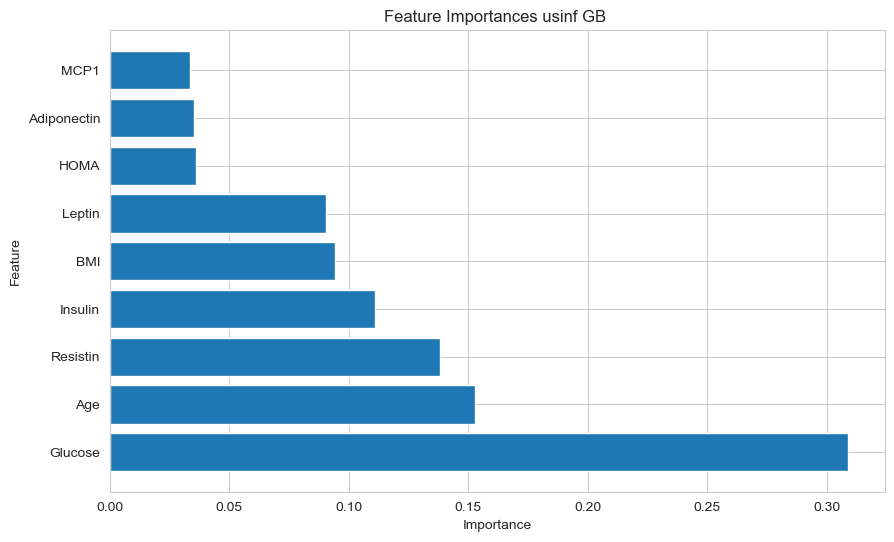

In [68]:
importances = gb_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head())

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances usinf GB ')
plt.show()


The feature importance analysis using Gradient Boosting reveals the following insights:

1. **Glucose** has the highest importance with a value of 0.309, indicating that it is the most influential feature in predicting breast cancer among the variables considered.
2. **Age** follows as the second most important feature with an importance score of 0.153, suggesting that age also plays a significant role in the classification.
3. **Resistin** ranks third in importance at 0.138, highlighting its relevance in the predictive model.
4. **Insulin** and **BMI** are also notable features, with importance scores of 0.111 and 0.094, respectively.

This analysis underscores the importance of physiological indicators such as glucose levels, age, and metabolic factors like resistin and insulin in predicting breast cancer. Understanding these influential features can guide clinicians in prioritizing assessments and interventions, ultimately improving patient outcomes.

**NOTE :** The results above obtained in our analysis were confirmed by Austria et al. in their study comparing machine learning algorithms in breast cancer prediction using the Coimbra dataset [2].


---

# General Conclusion

### Model Performance:
- Our Gradient Boosting model exhibits strong overall performance in identifying breast cancer cases, with a **Test Accuracy of 83.33%** and an **F1 Score of 80.00%**. These metrics demonstrate the model's effectiveness in correctly classifying cancerous cases while minimizing misclassifications.

### Identification of High-Risk Cases:
- With a Test Accuracy of **83.33%**, our model accurately identifies high-risk cases of breast cancer. These cases require immediate attention and further diagnostic procedures, facilitating **timely intervention and treatment**.

### False Positive and False Negative Rates:
- While our model performs well overall, ongoing monitoring of false positive and false negative rates is essential. False positives may lead to unnecessary concern or treatment, while false negatives could delay necessary interventions. Addressing and minimizing these rates will enhance the model's reliability over time.

### Feature Importance:
- Analysis of feature importance highlights Glucose levels, Age, Resistin levels, Insulin levels, and BMI levels as influential factors in predicting breast cancer. Understanding these factors enables clinicians to prioritize diagnostic tests and interventions for patients with higher risk profiles.

### Clinical Recommendations:
- We recommend integrating our Gradient Boosting model into clinical practice as a screening tool to prioritize high-risk patients for further examination. Additionally, clinicians should consider conducting additional tests for cases where the model's prediction is uncertain, thereby improving diagnostic accuracy and patient outcomes.

### Ethical Considerations:
- Ethical considerations, including patient privacy, data biases, and transparency in predictions, are paramount. Clinicians must prioritize patient **confidentiality** and informed consent while utilizing the model for diagnostic purposes, ensuring ethical and responsible use.

### Note on Data Instances and Accuracy:
- Increasing the number of data instances will likely further enhance the model's accuracy. As our model learns from a wider range of cases, it becomes more adept at recognizing different aspects of breast cancer, ultimately improving diagnostic accuracy and treatment decisions.


---

## Bibliography
1. Breast Cancer Coimbra Dataset, https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra Coimbra , (last accessed: April, 2024).

2. Austria, Yolanda & Goh, Marie & Jr, Lorenzo & Lalata, Jay-Ar & Goh, Joselito & Vicente, Heintjie. (2019). Comparison of Machine Learning Algorithms in Breast Cancer Prediction Using the Coimbra Dataset. International journal of simulation: systems, science & technology. 10.5013/IJSSST.a.20.S2.23. (https://www.researchgate.net/publication/337193772)

3. Patrício, Miguel, et al. "Using Resistin, glucose, age and BMI to predict the presence of breast cancer." BMC Cancer 18 (2018): n. pag. (https://doi.org/10.1186/s12885-018-4886-9)